In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import os
import datetime

In [7]:
wine_data = "winemag_reviews_v2.csv"

In [8]:
wine_data = pd.read_csv(wine_data)
wine_data.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [9]:
wine_data_update = wine_data.drop(columns=["Unnamed: 0","description","region_1","region_2","taster_name","taster_twitter_handle"])
wine_data_update.head()

,country,designation,points,price,province,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
wine_data_update.count()

country        129908
designation     92506
points         129971
price          120975
province       129908
title          129971
variety        129970
winery         129971
dtype: int64

In [11]:
wine_data_update_even = wine_data_update.dropna(subset=['price'])
wine_data_update_even.head()

,country,designation,points,price,province,title,variety,winery
1,Portugal,Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [12]:
wine_data_update_even.count()

country        120916
designation     86196
points         120975
price          120975
province       120916
title          120975
variety        120974
winery         120975
dtype: int64

In [13]:
wine_data_update_even = wine_data_update_even.sort_values(by = 'points', ascending=False)
wine_data_update_even.head(50)

,country,designation,points,price,province,title,variety,winery
122935,France,NaN,100,848.0,Bordeaux,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion
89728,France,Cristal Vintage Brut,100,250.0,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,France,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
58352,France,NaN,100,150.0,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
111756,France,NaN,100,359.0,Bordeaux,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
7335,Italy,Occhio di Pernice,100,210.0,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
111755,France,NaN,100,1500.0,Bordeaux,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
111754,Italy,Cerretalto,100,270.0,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri
45781,Italy,Riserva,100,550.0,Tuscany,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
118058,US,La Muse,100,450.0,California,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité


In [14]:
wine_data_update_even=wine_data_update_even.reset_index(drop=True)
wine_data_update_even.head(10)

,country,designation,points,price,province,title,variety,winery
0,France,NaN,100,848.0,Bordeaux,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion
1,France,Cristal Vintage Brut,100,250.0,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
2,France,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
3,France,NaN,100,150.0,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
4,France,NaN,100,359.0,Bordeaux,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
5,Italy,Occhio di Pernice,100,210.0,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
6,France,NaN,100,1500.0,Bordeaux,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
7,Italy,Cerretalto,100,270.0,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri
8,Italy,Riserva,100,550.0,Tuscany,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
9,US,La Muse,100,450.0,California,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité


In [15]:
#Only show wines that received the 5 highest possible ratings: 100,99,98,97, & 96

wine_data_new_even_96above = wine_data_update_even[wine_data_update_even['points']>=96]
wine_data_new_even_96above.count()

country        805
designation    643
points         805
price          805
province       805
title          805
variety        805
winery         805
dtype: int64

In [16]:
wine_data_new_even_96above.head()

,country,designation,points,price,province,title,variety,winery
0,France,NaN,100,848.0,Bordeaux,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion
1,France,Cristal Vintage Brut,100,250.0,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
2,France,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
3,France,NaN,100,150.0,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
4,France,NaN,100,359.0,Bordeaux,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases


In [17]:
new_price=wine_data_new_even_96above['price'].astype(str).replace('\.0', '', regex=True)
new_price.head()
                                                            

0    848
1    250
2    617
3    150
4    359
Name: price, dtype: object

In [22]:
winefinal_df = pd.DataFrame(wine_data_new_even_96above) 
# winefinal_df.head()

winefinal_df['Price'] = new_price
# winefinal_df.head()

winefinal_df['Price'] = winefinal_df['Price'].astype(int)
# winefinal_df.head()


winefinal_df = winefinal_df.drop(columns=['price'])
winefinal_df.head()

winefinal_df = winefinal_df.rename(columns={"country": "Country", "designation": "Designation", "points": "Points", 
                                            "province": "Province", "title": "Title", "variety": "Variety", "winery": "Winery"})


winefinal_df = winefinal_df[['Country','Designation','Province', 'Title', 'Variety', 'Winery', 'Points', 'Price']]
winefinal_df.head()


,Country,Designation,Province,Title,Variety,Winery,Points,Price
0,France,NaN,Bordeaux,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion,100,848
1,France,Cristal Vintage Brut,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer,100,250
2,France,Le Mesnil Blanc de Blancs Brut,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,100,617
3,France,NaN,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton,100,150
4,France,NaN,Bordeaux,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases,100,359


In [26]:
points=winefinal_df['Points']
# print(points)

price=winefinal_df['Price']
# print(price)


value_score=(points-price)
# print(value_score)

In [27]:
winefinal_df['Bang For Buck Score'] = value_score
winefinal_df.head()

,Country,Designation,Province,Title,Variety,Winery,Points,Price,Bang For Buck Score
0,France,NaN,Bordeaux,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion,100,848,-748
1,France,Cristal Vintage Brut,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer,100,250,-150
2,France,Le Mesnil Blanc de Blancs Brut,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,100,617,-517
3,France,NaN,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton,100,150,-50
4,France,NaN,Bordeaux,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases,100,359,-259


In [28]:
winefinal_df = winefinal_df.sort_values(by = 'Bang For Buck Score', ascending=False)
winefinal_df=winefinal_df.reset_index(drop=True)
winefinal_df.head(50)

,Country,Designation,Province,Title,Variety,Winery,Points,Price,Bang For Buck Score
0,US,NaN,Washington,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo,96,20,76
1,US,Estate,Oregon,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay,The Eyrie Vineyards,96,27,69
2,Italy,NaN,Tuscany,Isole e Olena 2010 Chianti Classico,Red Blend,Isole e Olena,96,27,69
3,US,Grenache Noir,California,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache,Donkey & Goat,96,27,69
4,Austria,Gaisberg Reserve,Kamptal,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Eichinger,96,28,68
5,France,NaN,Bordeaux,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,Château Filhot,96,28,68
6,France,Saering Grand Cru,Alsace,Domaines Schlumberger 2014 Saering Grand Cru R...,Riesling,Domaines Schlumberger,96,29,67
7,US,TFL,Oregon,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir,Sineann,96,30,66
8,Spain,Solera 1927,Andalucia,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez,Alvear,96,30,66
9,US,Lola,Washington,Efeste 2009 Lola Chardonnay (Columbia Valley (...,Chardonnay,Efeste,96,30,66


In [38]:
winefinal_df_topten_new = winefinal_df[winefinal_df['Bang For Buck Score']>=65]
winefinal_df_topten_new.count()

Country                10
Designation             7
Province               10
Title                  10
Variety                10
Winery                 10
Points                 10
Price                  10
Bang For Buck Score    10
dtype: int64

In [39]:
winefinal_df_topten_new

,Country,Designation,Province,Title,Variety,Winery,Points,Price,Bang For Buck Score
0,US,NaN,Washington,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo,96,20,76
1,US,Estate,Oregon,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay,The Eyrie Vineyards,96,27,69
2,Italy,NaN,Tuscany,Isole e Olena 2010 Chianti Classico,Red Blend,Isole e Olena,96,27,69
3,US,Grenache Noir,California,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache,Donkey & Goat,96,27,69
4,Austria,Gaisberg Reserve,Kamptal,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Eichinger,96,28,68
5,France,NaN,Bordeaux,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,Château Filhot,96,28,68
6,France,Saering Grand Cru,Alsace,Domaines Schlumberger 2014 Saering Grand Cru R...,Riesling,Domaines Schlumberger,96,29,67
7,US,TFL,Oregon,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir,Sineann,96,30,66
8,Spain,Solera 1927,Andalucia,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez,Alvear,96,30,66
9,US,Lola,Washington,Efeste 2009 Lola Chardonnay (Columbia Valley (...,Chardonnay,Efeste,96,30,66


In [40]:
rank = ["1", "2(tie)", "2(tie)", "2(tie)", "5(tie)", "5(tie)", "7", "8(tie)", "8(tie)", "8(tie)"]

In [41]:
winefinal_df_topten_new['Rank'] = rank
winefinal_df_topten_new

C:\Users\adamd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country,Designation,Province,Title,Variety,Winery,Points,Price,Bang For Buck Score,Rank
0,US,NaN,Washington,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo,96,20,76,1
1,US,Estate,Oregon,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay,The Eyrie Vineyards,96,27,69,2(tie)
2,Italy,NaN,Tuscany,Isole e Olena 2010 Chianti Classico,Red Blend,Isole e Olena,96,27,69,2(tie)
3,US,Grenache Noir,California,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache,Donkey & Goat,96,27,69,2(tie)
4,Austria,Gaisberg Reserve,Kamptal,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Eichinger,96,28,68,5(tie)
5,France,NaN,Bordeaux,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,Château Filhot,96,28,68,5(tie)
6,France,Saering Grand Cru,Alsace,Domaines Schlumberger 2014 Saering Grand Cru R...,Riesling,Domaines Schlumberger,96,29,67,7
7,US,TFL,Oregon,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir,Sineann,96,30,66,8(tie)
8,Spain,Solera 1927,Andalucia,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez,Alvear,96,30,66,8(tie)
9,US,Lola,Washington,Efeste 2009 Lola Chardonnay (Columbia Valley (...,Chardonnay,Efeste,96,30,66,8(tie)


In [43]:
winefinal_df_topten_final = winefinal_df_topten_new[['Rank','Bang For Buck Score','Points', 'Price', 'Title', 'Winery', 'Variety', 'Country', 'Province', 'Designation']]
# winefinal_df_topten_final



winefinal_df_topten_final = winefinal_df_topten_final.set_index('Rank')
winefinal_df_topten_final


,Bang For Buck Score,Points,Price,Title,Winery,Variety,Country,Province,Designation
Rank,,,,,,,,,
1,76,96,20,Rulo 2007 Syrah (Columbia Valley (WA)),Rulo,Syrah,US,Washington,NaN
2(tie),69,96,27,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,The Eyrie Vineyards,Chardonnay,US,Oregon,Estate
2(tie),69,96,27,Isole e Olena 2010 Chianti Classico,Isole e Olena,Red Blend,Italy,Tuscany,NaN
2(tie),69,96,27,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Donkey & Goat,Grenache,US,California,Grenache Noir
5(tie),68,96,28,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Eichinger,Riesling,Austria,Kamptal,Gaisberg Reserve
5(tie),68,96,28,Château Filhot 2014 Sauternes,Château Filhot,Bordeaux-style White Blend,France,Bordeaux,NaN
7,67,96,29,Domaines Schlumberger 2014 Saering Grand Cru R...,Domaines Schlumberger,Riesling,France,Alsace,Saering Grand Cru
8(tie),66,96,30,Sineann 2015 TFL Pinot Noir (Willamette Valley),Sineann,Pinot Noir,US,Oregon,TFL
8(tie),66,96,30,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Alvear,Pedro Ximénez,Spain,Andalucia,Solera 1927


In [53]:
winefinal_df_topten_final.to_csv = "BangForBuckTop10.csv"

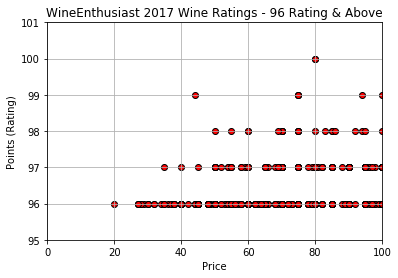

In [52]:
x_limit = 100
x_axis = np.arange(0, x_limit, 10)


y_limit = 101
y_axis = np.arange(95, y_limit, 1)



# Build the scatter plots for each city types

plt.figure()
plt.scatter(price, points, marker="o", facecolors="red", edgecolors="black", alpha=1)




# Incorporate the other graph properties

plt.title("WineEnthusiast 2017 Wine Ratings - 96 Rating & Above")
plt.xlabel("Price")
plt.ylabel("Points (Rating)")

plt.xlim(0, x_limit)
plt.ylim(95, y_limit)

plt.grid()

plt.savefig("wine_scatter_plot.png")
plt.show()